# 1. Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]

mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]

std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]

test_data -= mean
test_data /= std

In [4]:
train_data.shape

(404, 13)

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

import tensorflow as tf

input_layer = tf.keras.layers.Input(shape=(train_data.shape[1], ))
dense_1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)
dense_2 = tf.keras.layers.Dense(64, activation='relu')(dense_1)
outputs = tf.keras.layers.Dense(1, activation='relu')(dense_2)

model = tf.keras.Model(inputs=input_layer, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


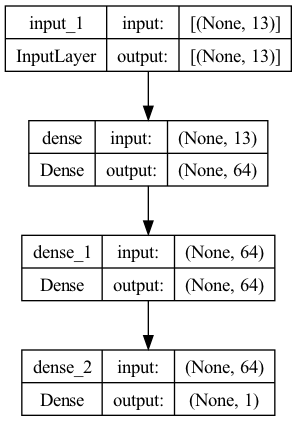

In [6]:
from tensorflow.keras import models, utils

utils.plot_model(model, show_shapes=True)

In [7]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [8]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]

history = model.fit(train_data, train_labels,
                    epochs=200,
                    batch_size=512,
                    validation_data=(test_data, test_labels))

Epoch 1/200
1/1 [==============================] - 0s 258ms/step - loss: 577.2645 - mae: 22.2250 - val_loss: 604.1191 - val_mae: 22.8573
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 573.7936 - mae: 22.1578 - val_loss: 600.1693 - val_mae: 22.7793
Epoch 3/200
1/1 [==============================] - 0s 14ms/step - loss: 569.8663 - mae: 22.0770 - val_loss: 595.8638 - val_mae: 22.6918
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 565.6834 - mae: 21.9885 - val_loss: 591.3600 - val_mae: 22.5982
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 561.3416 - mae: 21.8933 - val_loss: 586.7391 - val_mae: 22.5001
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 556.9061 - mae: 21.7944 - val_loss: 582.0396 - val_mae: 22.3987
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 552.4184 - mae: 21.6932 - val_loss: 577.2884 - val_mae: 22.2947
Epoch 8/200
1/1 [==============================]

Epoch 61/200
1/1 [==============================] - 0s 11ms/step - loss: 157.9740 - mae: 10.3225 - val_loss: 159.0311 - val_mae: 10.7609
Epoch 62/200
1/1 [==============================] - 0s 12ms/step - loss: 151.3437 - mae: 10.0594 - val_loss: 152.4298 - val_mae: 10.5186
Epoch 63/200
1/1 [==============================] - 0s 10ms/step - loss: 145.0620 - mae: 9.8111 - val_loss: 146.2043 - val_mae: 10.2746
Epoch 64/200
1/1 [==============================] - 0s 10ms/step - loss: 139.1339 - mae: 9.5742 - val_loss: 140.3519 - val_mae: 10.0294
Epoch 65/200
1/1 [==============================] - 0s 11ms/step - loss: 133.5594 - mae: 9.3410 - val_loss: 134.8643 - val_mae: 9.7834
Epoch 66/200
1/1 [==============================] - 0s 10ms/step - loss: 128.3338 - mae: 9.1176 - val_loss: 129.7376 - val_mae: 9.5395
Epoch 67/200
1/1 [==============================] - 0s 9ms/step - loss: 123.4483 - mae: 8.9066 - val_loss: 124.9561 - val_mae: 9.3085
Epoch 68/200
1/1 [==============================] 

1/1 [==============================] - 0s 11ms/step - loss: 28.1580 - mae: 3.8690 - val_loss: 31.2912 - val_mae: 4.3785
Epoch 123/200
1/1 [==============================] - 0s 11ms/step - loss: 27.7459 - mae: 3.8348 - val_loss: 30.8378 - val_mae: 4.3481
Epoch 124/200
1/1 [==============================] - 0s 11ms/step - loss: 27.3558 - mae: 3.8020 - val_loss: 30.4069 - val_mae: 4.3201
Epoch 125/200
1/1 [==============================] - 0s 11ms/step - loss: 26.9863 - mae: 3.7711 - val_loss: 29.9972 - val_mae: 4.2927
Epoch 126/200
1/1 [==============================] - 0s 11ms/step - loss: 26.6351 - mae: 3.7410 - val_loss: 29.6081 - val_mae: 4.2658
Epoch 127/200
1/1 [==============================] - 0s 11ms/step - loss: 26.3016 - mae: 3.7130 - val_loss: 29.2389 - val_mae: 4.2396
Epoch 128/200
1/1 [==============================] - 0s 16ms/step - loss: 25.9847 - mae: 3.6860 - val_loss: 28.8892 - val_mae: 4.2150
Epoch 129/200
1/1 [==============================] - 0s 14ms/step - loss: 25

1/1 [==============================] - 0s 12ms/step - loss: 17.5246 - mae: 2.9539 - val_loss: 22.0010 - val_mae: 3.5924
Epoch 184/200
1/1 [==============================] - 0s 11ms/step - loss: 17.4360 - mae: 2.9456 - val_loss: 21.9634 - val_mae: 3.5873
Epoch 185/200
1/1 [==============================] - 0s 11ms/step - loss: 17.3486 - mae: 2.9373 - val_loss: 21.9273 - val_mae: 3.5823
Epoch 186/200
1/1 [==============================] - 0s 11ms/step - loss: 17.2624 - mae: 2.9291 - val_loss: 21.8925 - val_mae: 3.5773
Epoch 187/200
1/1 [==============================] - 0s 11ms/step - loss: 17.1773 - mae: 2.9209 - val_loss: 21.8594 - val_mae: 3.5724
Epoch 188/200
1/1 [==============================] - 0s 15ms/step - loss: 17.0932 - mae: 2.9128 - val_loss: 21.8276 - val_mae: 3.5676
Epoch 189/200
1/1 [==============================] - 0s 40ms/step - loss: 17.0103 - mae: 2.9049 - val_loss: 21.7963 - val_mae: 3.5627
Epoch 190/200
1/1 [==============================] - 0s 13ms/step - loss: 16

/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/ipykernel_34254/2438909638.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


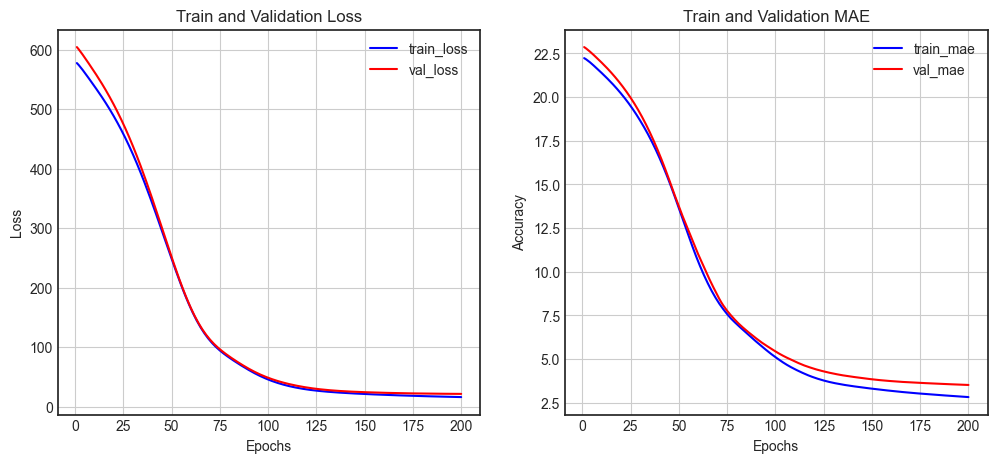

In [9]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [10]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 873us/step - loss: 21.5184 - mae: 3.5152


[21.51844024658203, 3.515247344970703]

In [12]:
del model

# 2. Reuters 딥러닝 모델

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [13]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [14]:
train_data_org = train_data
train_labels_org = train_labels

In [15]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_labels))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [17]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  # [[YOUR CODE]]
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [18]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

input_layer = tf.keras.layers.Input(shape=(10000, ))
x = tf.keras.layers.Dense(128)(input_layer)
x = tf.keras.layers.BatchNormalization(axis=1)(x)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.BatchNormalization(axis=1)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(46, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=outputs)


In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_3 (Dense)             (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                           

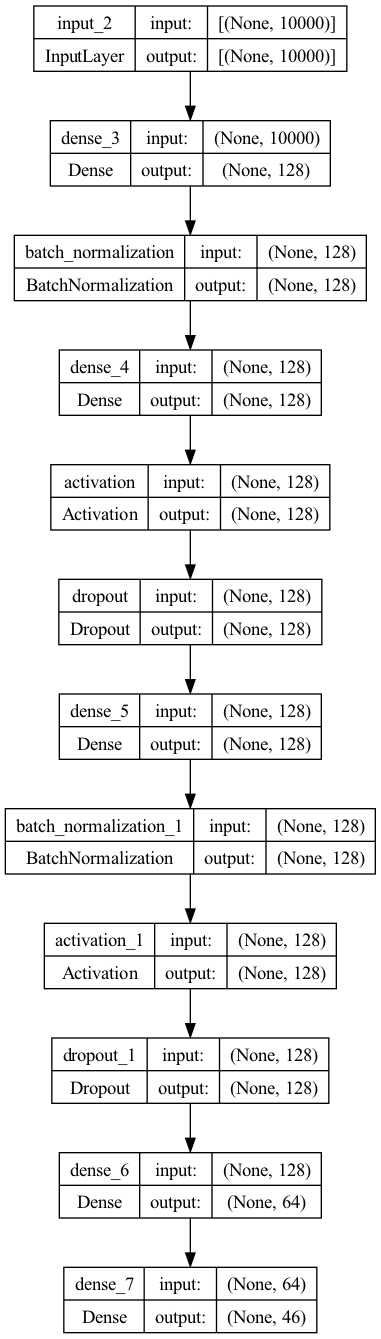

In [20]:
utils.plot_model(model, show_shapes=True)

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5')
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

In [23]:
history = model.fit(x_train, y_train, epochs=30,
                    batch_size=512,
                    callbacks=[check_point_cb, early_stopping_cb],
                    validation_data=(x_val, y_val))

Epoch 1/30
14/14 [==============================] - 1s 59ms/step - loss: 2.8406 - accuracy: 0.4017 - val_loss: 3.3142 - val_accuracy: 0.5365
Epoch 2/30
 3/14 [=====>........................] - ETA: 0s - loss: 1.8507 - accuracy: 0.5833

/Users/salgu/miniconda3/envs/py38/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 1s 44ms/step - loss: 1.6687 - accuracy: 0.6119 - val_loss: 2.7252 - val_accuracy: 0.6407
Epoch 3/30
14/14 [==============================] - 1s 49ms/step - loss: 1.2404 - accuracy: 0.7001 - val_loss: 2.4499 - val_accuracy: 0.7066
Epoch 4/30
14/14 [==============================] - 1s 41ms/step - loss: 0.9489 - accuracy: 0.7824 - val_loss: 2.2900 - val_accuracy: 0.7302
Epoch 5/30
14/14 [==============================] - 1s 45ms/step - loss: 0.7439 - accuracy: 0.8204 - val_loss: 2.0864 - val_accuracy: 0.7467
Epoch 6/30
14/14 [==============================] - 1s 40ms/step - loss: 0.5983 - accuracy: 0.8496 - val_loss: 1.9032 - val_accuracy: 0.7471
Epoch 7/30
14/14 [==============================] - 0s 26ms/step - loss: 0.4760 - accuracy: 0.8796 - val_loss: 1.7540 - val_accuracy: 0.7609
Epoch 8/30
14/14 [==============================] - 0s 35ms/step - loss: 0.3789 - accuracy: 0.9088 - val_loss: 1.5969 - val_accuracy: 0.7738
Epoch 9/30
14/14 [======

/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/ipykernel_34254/1201330491.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


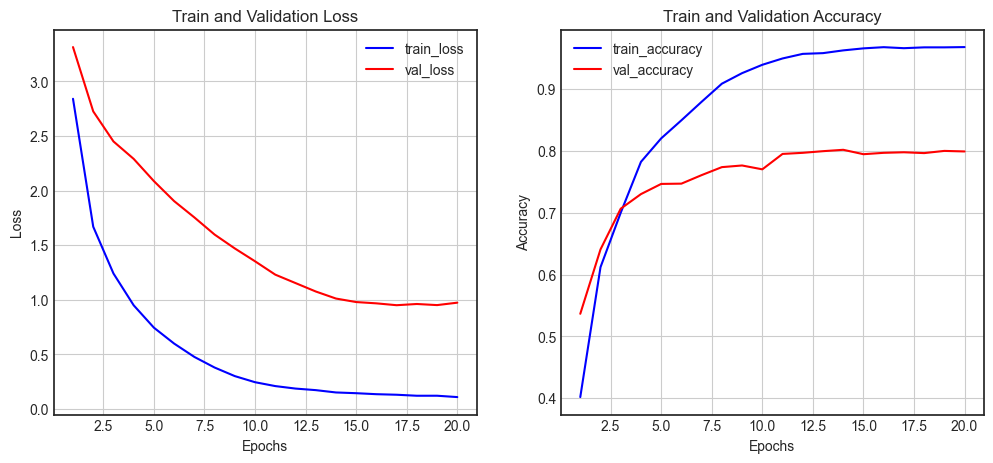

In [24]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [25]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.0454 - accuracy: 0.7872


[1.0453613996505737, 0.7871772050857544]

In [26]:
del model

# 3. CIFAR10 딥러닝 모델

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [28]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [29]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)

In [30]:
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [31]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/ipykernel_34254/512647112.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


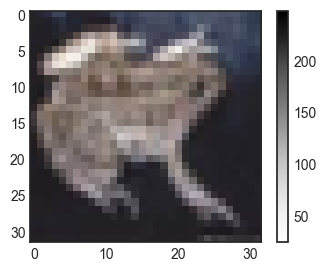

In [32]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure(figsize=(4,3))
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [33]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [34]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [35]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(40000, 3072) (40000, 1)
(10000, 3072) (10000, 1)
(10000, 3072) (10000, 1)


In [36]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [37]:
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

In [40]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

import tensorflow as tf

def create_model(input_shape, num_classes=10):
    
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Dense(2048, activation='relu')(input_layer)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=input_layer, outputs=outputs)
    return model

INPUT_SHAPE = x_train.shape[1]
model = create_model(INPUT_SHAPE, num_classes=10)

In [41]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_8 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_2 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_3 (Bat  (None, 1024)              4096      
 chNormalization)                                          

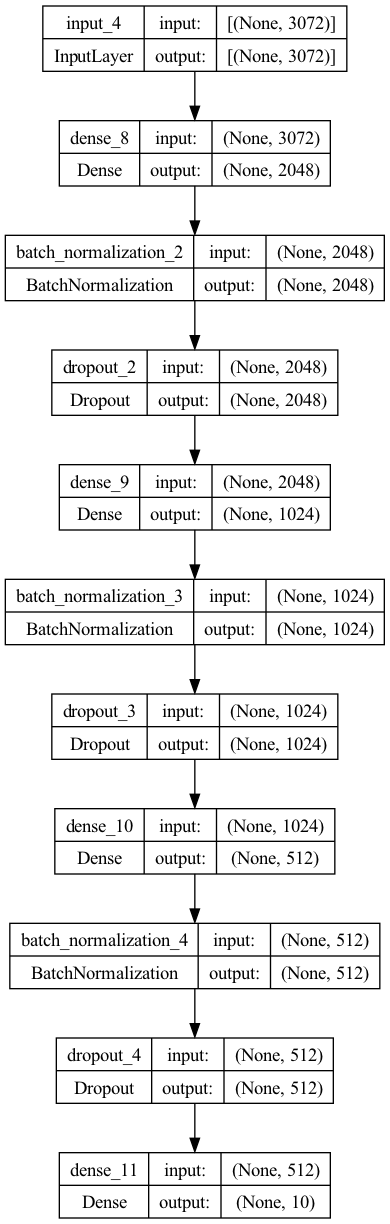

In [42]:
utils.plot_model(model, show_shapes=True)

In [43]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5')
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

In [44]:
history = model.fit(x_train, y_train, epochs=30,
                    batch_size=512,
                    callbacks=[check_point_cb, early_stopping_cb],
                    validation_data=(x_val, y_val))

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 2.0124 - accuracy: 0.3242

/Users/salgu/miniconda3/envs/py38/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 11s 135ms/step - loss: 2.0124 - accuracy: 0.3242 - val_loss: 2.2548 - val_accuracy: 0.2808
Epoch 2/30
79/79 [==============================] - 10s 131ms/step - loss: 1.7233 - accuracy: 0.4003 - val_loss: 1.9359 - val_accuracy: 0.3561
Epoch 3/30
79/79 [==============================] - 14s 172ms/step - loss: 1.6148 - accuracy: 0.4312 - val_loss: 1.9125 - val_accuracy: 0.3329
Epoch 4/30
79/79 [==============================] - 11s 137ms/step - loss: 1.5396 - accuracy: 0.4538 - val_loss: 1.9208 - val_accuracy: 0.3376
Epoch 5/30
79/79 [==============================] - 12s 151ms/step - loss: 1.4795 - accuracy: 0.4781 - val_loss: 2.0247 - val_accuracy: 0.3070
Epoch 6/30
79/79 [==============================] - 12s 153ms/step - loss: 1.4334 - accuracy: 0.4904 - val_loss: 2.1994 - val_accuracy: 0.2725


/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/ipykernel_34254/4275291862.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


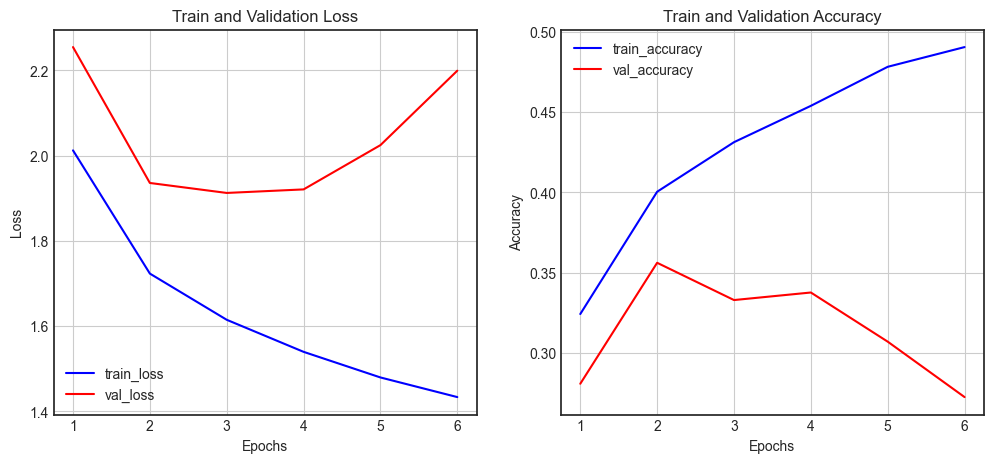

In [45]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [46]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.9191 - accuracy: 0.3256


[1.9191248416900635, 0.3255999982357025]

In [47]:
del model